# SCC-ICMC-USP - 2o. semestre de 2021
# SCC0275 - Exercício 3

### Profa. Roseli A. F. Romero

### Monitor: Kenzo Sakiyama

Alunos:


1.  Éverton Luís Mendes da Silva 10728171



# Carregando Iris

In [1]:
import pandas as pd

In [2]:
iris = pd.read_csv('iris_modif_novo.data', index_col=0)
iris

,A,B,C,D,E,F
0,4.9,3.0,1.4,30.0,0.2,Iris-setosa
1,4.7,3.2,1.3,32.0,0.2,Iris-setosa
2,4.6,3.1,1.5,31.0,0.2,Iris-setosa
3,5.0,3.6,1.4,36.0,0.2,Iris-setosa
4,5.4,3.9,1.7,39.0,0.4,Iris-setosa
...,...,...,...,...,...,...
144,6.7,3.0,5.2,30.0,2.3,Iris-virginica
145,6.3,2.5,5.0,25.0,1.9,Iris-virginica
146,6.5,3.0,5.2,30.0,2.0,Iris-virginica
147,6.2,3.4,5.4,34.0,2.3,Iris-virginica


# Parte 1 - Correlação e Covariância

Use o material de apoio "Ferramentas de visualização e exploração de dados.ipynb".

### Questão 01.
* Calcule a matriz de covariância (`np.cov`)
* Crie um heatmap (`sns.heatmap`) para cada matriz
* Dica: Atente-se ao atributo rowvar. Lembre-se de **não** incluir o atributo classe/alvo.

In [3]:
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt


plt.rcParams['figure.figsize'] = [10, 10]

<AxesSubplot:>

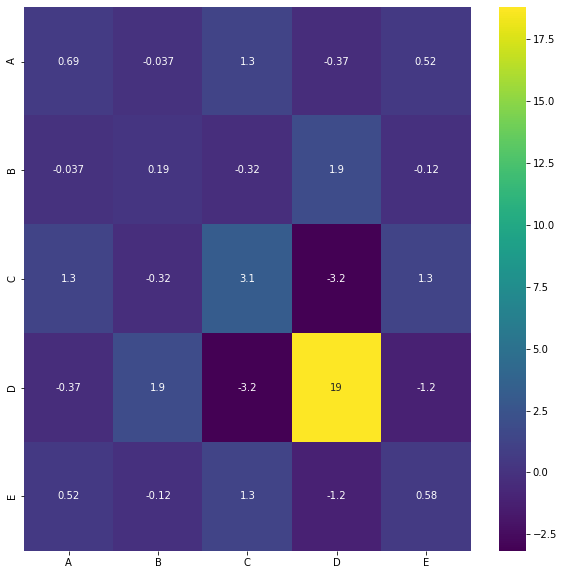

In [4]:
sn.heatmap(iris.cov(), annot=True, cmap='viridis')

### Questão 02.

Repita o exercício anterior para correlação (usando `pandas.DataFrame.corr` ou `np.corrcoef`) utilizando o método de Pearson. Gere um heatmap da matriz.

<AxesSubplot:>

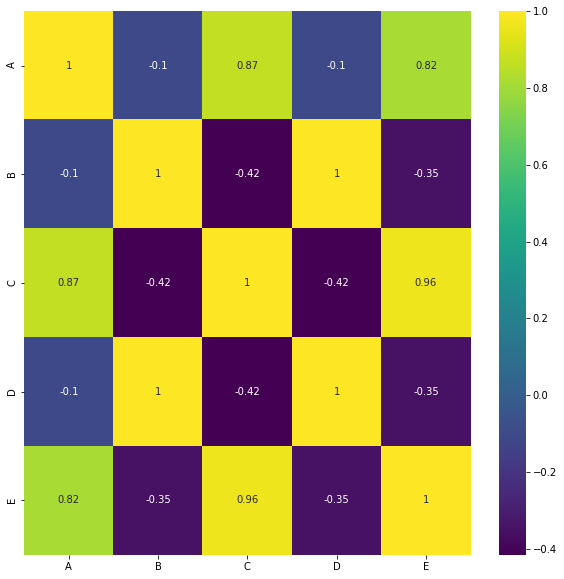

In [5]:
sn.heatmap(iris.corr(method='pearson'), annot=True, cmap='viridis')

### Questão 03.

O método da Q2 apresenta alguma vantagem com relação ao método da Q1?

The Q2 method has an advantage in how the elements of the matrix are calculated, that is, each element of the correlation matrix contains information on the deviations of each set taking into account the standard deviation of the samples (values ​​between -1 and 1) .

### Questão 04.

- Identifique os atributos mais e menos correlacionados (em módulo) usando a correlação de Pearson.
- Gere scatter plots (`matplotlib.pyplot.scatter`) destes pares de variáveis e comente como os dados estão distribuídos nos gráficos.

In [6]:
def max_min_corr(df):
    '''the function calculates the max and min value of a correlation matrix, obtained from a DataFrame
    Args:
        df, DataFrame
    Return:
        first_max,
        second_max.
        first_min, 
        second_min, 
    '''

    corr_iris=df.corr(method='pearson').abs()
    upper = corr_iris.where(np.triu(np.ones(corr_iris.shape), k=1).astype(np.bool))
    
    first_max=upper.max().dropna().idxmax()
    second_max=upper.idxmax()[str(first_max)]

    first_min=upper.min().dropna().idxmin()
    second_min=upper.idxmin()[str(first_min)]

    print('The variables with more correlation are {} and {}'.format(first_max, second_max))
    print('The variables with less correlation are {} and {}'.format(first_min, second_min))

    return first_max, second_max, first_min, second_min

In [7]:
max_min_corr(iris)

The variables with more correlation are D and B
The variables with more correlation are B and A


('D', 'B', 'B', 'A')

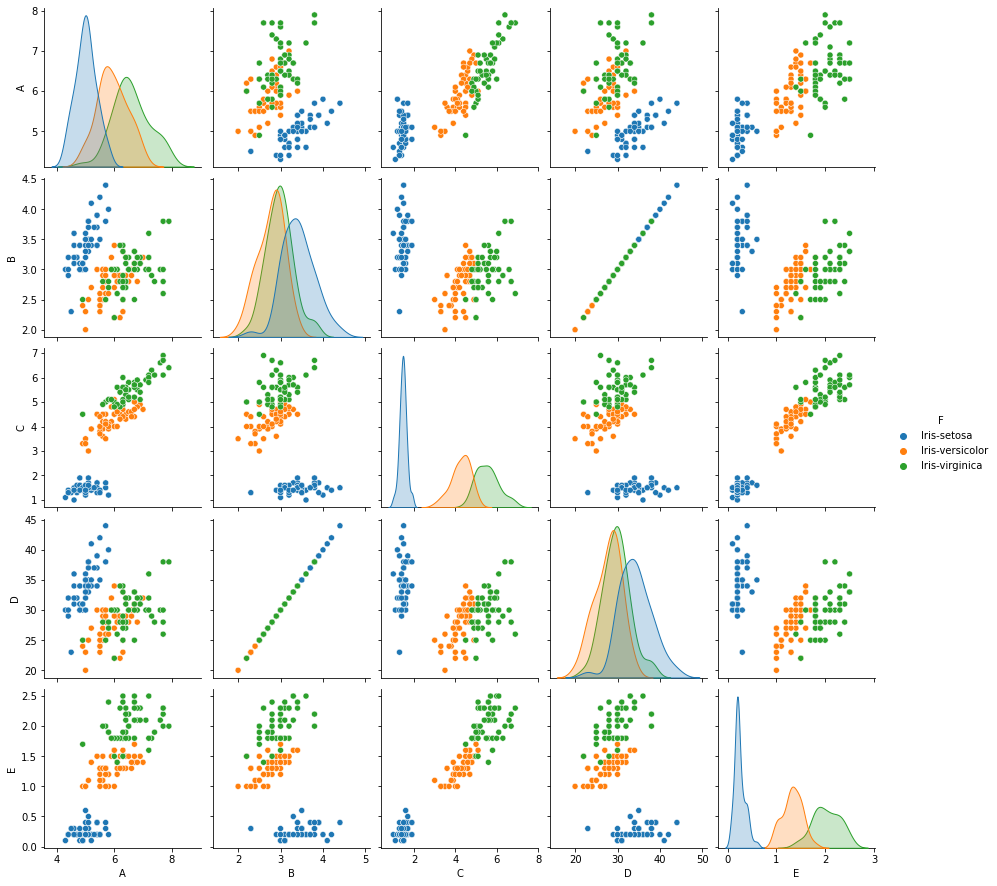

In [8]:
sn.pairplot(iris, hue='F', diag_kind='kde')

We can see from the attributes that there is a big difference in the data between the Setosa iris and other types of iris. However, Iris-versicolor and Iris-Virginica have a great similarity in the data. That is, even though they are different species, in some attributes they only share a border (such as 'C'x'A') and in others the data overlap and it is not possible to differentiate between the two species(such as 'B'x'A'). 
In terms of biology, there was probably a first separation between iris-setosa and iris-versicolor_virginica. And after a while there was a mutation that created the versicolor and virginica species. Thus, there was the mutation that created Iris-setosa is older than that of Iris-versicolor and Iris-virginica

Resposta:

### Questão 05.

*  Utilizando o resultado da matriz de correlação, verifique se existe um atributo reduntante nessa base e crie um novo `Dataframe` sem ele e justifique.

In [53]:
max_min_corr(iris)

The variables with more correlation are D and B
The variables with more correlation are B and A


('D', 'B', 'B', 'A')

From the correlations we see that the variables 'B' and 'D' are linearly correlated (corr=1), that is, they express the same behavior. If one grows, the other grows, if one decreases, the other also decreases. In this way, we can exclude one of the variables

In [9]:
iris_novo = iris.drop(columns=['D'])

# Parte 2 - PCA

Na segunda parte do exercício, focaremos na análise de um novo conjunto de dados. O novo conjunto de dados apresenta dados a respeito da composição química de vinhos de 3 diferentes origens. Uma descrição mais detalhada do conjunto de dados será apresentada a seguir. Fiquem a vontade para explorar o novo conjunto de dados como quiserem.

In [10]:
from sklearn.datasets import load_wine

In [11]:
raw_data = load_wine()
print(raw_data["DESCR"])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [12]:
wine_df = pd.DataFrame(raw_data["data"], columns=raw_data["feature_names"])
wine_df["class"] = raw_data["target"]

In [13]:
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


# Questão 01

*     ***Observe que o conjunto de dados possuí apenas atributos numéricos***. Calcule todos os componentes principais utilizando PCA  (`sklearn.decomposition.PCA`). Lembre-se de padronizar os dados antes de aplica o PCA (sklearn.preprocessing.StandardScaler)
* Determine quanta variância dos dados cada componente é capaz de captar.
* ***Lembre-se*** de não considerar o atributo classe.

In [14]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [15]:
scaler=StandardScaler()
pca=PCA()

In [16]:
pipeline=make_pipeline(scaler, pca)

In [17]:
new_wine_df=pd.DataFrame(pipeline.fit_transform(wine_df.drop(columns=['class']).values))

Text(0.5, 0, 'PCA components')

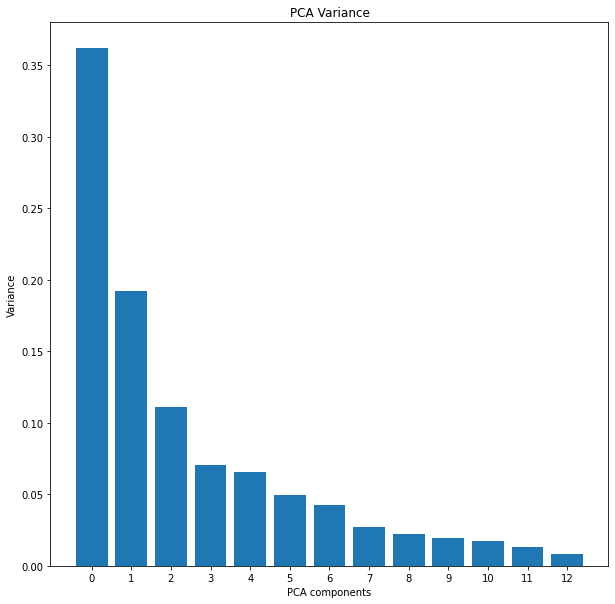

In [18]:
plt.title('PCA Variance')
plt.bar(range(pca.n_components_), pca.explained_variance_ratio_)
plt.xticks(range(pca.n_components_))
plt.ylabel('Variance')
plt.xlabel('PCA components')

# Questão 02

- Reduza a dimensionalidade do conjunto de dados para apenas **duas dimensões**.
- Qual o percentual da variância dos dados, duas componentes principais são capazes de captar?

* Dica: use o método ***fit_transform()*** da classe PCA.

In [19]:
new_wine_df[new_wine_df.columns[:2]].head() 

,0,1
0,3.316751,-1.443463
1,2.209465,0.333393
2,2.516740,-1.031151
3,3.757066,-2.756372
4,1.008908,-0.869831


In [20]:
print('The firsts two principal components capture a variance of {:.5}'.format(np.sum(pca.explained_variance_ratio_[:2])))

The firsts two principal components capture a variance of 0.55406


# Questão 03

Faça um scatter-plot dos dados transformados e comente a distribuição dos dados.

* Sugestão: Adicione cores diferentes para cada classe para facilitar a visualização
* Pode-se utilizar o seaborn para realizar o plot (*sns.scatterplot*)

In [21]:
two_columns=new_wine_df[new_wine_df.columns[:2]]

C:\Users\wever\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Second component')

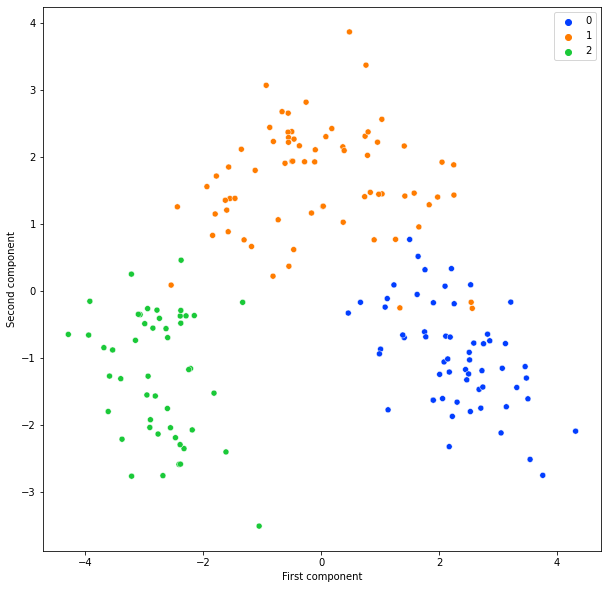

In [22]:
sn.scatterplot(two_columns[0].values, two_columns[1].values, hue=wine_df['class'].values, palette= 'bright')
plt.xlabel('First component')
plt.ylabel('Second component')